# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as multi
import numpy as np
from scipy.stats import zscore
import scanpy as sc

# Paths

In [2]:
path_in='../data'

# Load data

In [3]:
adata=sc.read_h5ad(path_in+'/MEL_IMM_SS2_GSE120575.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 14160 × 51005
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'treatment_response', 'treatment', 'percent.mt', 'seurat_clusters', 'annotation_CHETAH', 'cell_ontology', 'cell_ontology_id', 'annotation_major', 'annotation_immune', 'annotation_minor'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [4]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,treatment_response,treatment,percent.mt,seurat_clusters,annotation_CHETAH,cell_ontology,cell_ontology_id,annotation_major,annotation_immune,annotation_minor
index,,,,,,,,,,,,,,
A10_P3_M11,A10,409232.42,3274,Pre_P1,Responder,anti-CTLA4,3.950207,16,T CD4,NK,CL:0000623,NK,NK,NK
A11_P1_M11,A11,357029.54,2621,Pre_P1,Responder,anti-CTLA4,2.631995,11,T CD4,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
A11_P3_M11,A11,360530.60,3118,Pre_P1,Responder,anti-CTLA4,5.595626,11,T CD4,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
A11_P4_M11,A11,384902.47,4335,Pre_P1,Responder,anti-CTLA4,2.226492,11,T reg,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
A12_P3_M11,A12,155214.35,2945,Pre_P1,Responder,anti-CTLA4,12.066306,11,T CD4,T CD8 naïve,CL:0000900,T,T CD8,T CD8 naïve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H3_P5_M67_L001_T_enriched,H3,998037.96,4621,Post_P6,Non-responder,anti-PD1,12.266255,6,T CD8,T cycling,Tcycl,T,T cycling,T cycling
H4_P5_M67_L001_T_enriched,H4,1203541.67,6197,Post_P6,Non-responder,anti-PD1,11.683249,6,T CD8,T cycling,Tcycl,T,T cycling,T cycling
H5_P5_M67_L001_T_enriched,H5,333221.47,4785,Post_P6,Non-responder,anti-PD1,10.998559,6,T CD8,T cycling,Tcycl,T,T cycling,T cycling


In [5]:
adata.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
index,,,,,
TSPAN6,0.187429,55.624448,15.659886,2.952744,True
TNMD,0.025424,1.714588,1.125338,1.523620,False
DPM1,25.123941,5881.649656,9646.004091,0.609750,False
SCYL3,11.765325,4097.142960,3859.299081,1.061629,False
C1orf112,12.098376,4653.659295,3994.567182,1.164997,False
...,...,...,...,...,...
RP4-621B10.8,0.182768,88.265061,15.152647,3.793573,True
RP11-114I8.4,0.392161,64.404784,42.633505,1.510661,False
RP11-180C16.1,0.088489,11.094719,6.107714,1.816509,False


In [6]:
adata.X

<Compressed Sparse Column sparse matrix of dtype 'float32'
	with 48632842 stored elements and shape (14160, 51005)>

In [7]:
adata.obs['timepoint_response']=adata.obs['sample'].str.split('_').str[0].str.lower() +'_'+adata.obs['treatment_response'].str.lower()
adata.obs['timepoint_response']

index
A10_P3_M11                        pre_responder
A11_P1_M11                        pre_responder
A11_P3_M11                        pre_responder
A11_P4_M11                        pre_responder
A12_P3_M11                        pre_responder
                                    ...        
H3_P5_M67_L001_T_enriched    post_non-responder
H4_P5_M67_L001_T_enriched    post_non-responder
H5_P5_M67_L001_T_enriched    post_non-responder
H6_P5_M67_L001_T_enriched    post_non-responder
H7_P5_M67_L001_T_enriched    post_non-responder
Name: timepoint_response, Length: 14160, dtype: object

# Visualize

## Violin plots

In [8]:
def plot_stacked(adata,cell_type_list,gene_list,ax,groupby,cell_type_anno
                ):
    
    subset_data=adata[adata.obs[cell_type_anno].isin(cell_type_list)]

    sc.pl.stacked_violin(subset_data
                       ,groupby=groupby
                        ,var_names=genes_list,
                        swap_axes=True,
                        cmap="YlGnBu"
                        ,stripplot=False#True
                        ,jitter=True
                        ,return_fig=True
                         ,ax=ax
                        ).add_totals().show()

### GSE signatures

#### PD1

In [9]:
# read in the signatures
path_gse_sig='./input_data/GSEA_signatures/'

GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_DN=pd.read_csv(path_gse_sig+'GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_DN.v2023.2.Hs.tsv'
                                                   ,sep='\t').loc[16,'GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_DN'].split(',')

GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_UP=pd.read_csv(path_gse_sig+'GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_UP.v2023.2.Hs.tsv'
                                                   ,sep='\t').loc[16,'GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_UP'].split(',')

GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_DN=pd.read_csv(path_gse_sig+'GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_DN.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_DN'].split(',')

GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_UP=pd.read_csv(path_gse_sig+'GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_UP.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_UP'].split(',')

KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY=pd.read_csv(path_gse_sig+'KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY'].split(',')

WP_CANCER_IMMUNOTHERAPY_BY_PD1_BLOCKADE=pd.read_csv(path_gse_sig+'WP_CANCER_IMMUNOTHERAPY_BY_PD1_BLOCKADE.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'WP_CANCER_IMMUNOTHERAPY_BY_PD1_BLOCKADE'].split(',')

/home/msolovey/miniconda3/envs/community_paper/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


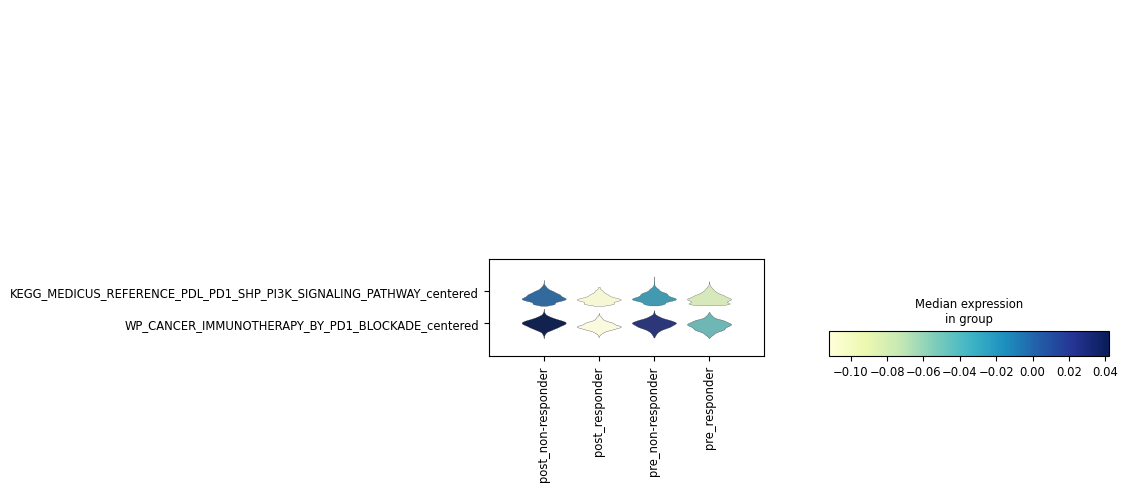

In [10]:
# Subset cells for a specific cell type
adata_Tex=adata[adata.obs['annotation_minor']=='T CD8 ex']

sc.tl.score_genes(adata_Tex
                     ,gene_list=KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY
                     ,score_name='KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY')
sc.tl.score_genes(adata_Tex
                     ,gene_list=WP_CANCER_IMMUNOTHERAPY_BY_PD1_BLOCKADE
                     ,score_name='WP_CANCER_IMMUNOTHERAPY_BY_PD1_BLOCKADE')

adata_Tex

GSE_sig_list=['KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNALING_PATHWAY'
              ,'WP_CANCER_IMMUNOTHERAPY_BY_PD1_BLOCKADE'
             ]

## center values
for score in GSE_sig_list:
    adata_Tex.obs[score + '_centered']=adata_Tex.obs[score]-np.mean(adata_Tex.obs[score])

# visualize
_, ax = plt.subplots(figsize=(8, 4.5))
sc.pl.stacked_violin(adata_Tex
                     ,groupby='timepoint_response'
                     ,var_names=[score + '_centered' for score in GSE_sig_list]
                     ,swap_axes=True
                     ,cmap="YlGnBu"
                     ,stripplot=False#True
                     ,jitter=True
                     ,return_fig=True
                     ,ax=ax
                     ,save="./output/PD1_signatures.png"
                    ).show()

#### CTLA4

In [11]:
# read in the signatures
path_gse_sig='./input_data/GSEA_signatures/'

BIOCARTA_CTLA4_PATHWAY=pd.read_csv(path_gse_sig+'BIOCARTA_CTLA4_PATHWAY.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'BIOCARTA_CTLA4_PATHWAY'].split(',')

KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SIGNALING_PATHWAY=pd.read_csv(path_gse_sig+'KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SIGNALING_PATHWAY.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SIGNALING_PATHWAY'].split(',')

REACTOME_CTLA4_INHIBITORY_SIGNALING=pd.read_csv(path_gse_sig+'REACTOME_CTLA4_INHIBITORY_SIGNALING.v2024.1.Hs.tsv'
                                                   ,sep='\t').loc[16,'REACTOME_CTLA4_INHIBITORY_SIGNALING'].split(',')

       'LINC02731', 'ENSG00000213963', 'ELOCP28', 'GVQW3', 'LINC01569',
       'PURPL', 'RPL23AP32', 'SEPTIN6', 'SARAF', 'TRBC1'],
      dtype='object')


/home/msolovey/miniconda3/envs/community_paper/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


       'ADGRG5', 'H4C6', 'KIR2DL2', 'KIR2DL5A', 'KIR2DS1', 'KIR2DS2',
       'KIR2DS5', 'MCPH1-AS1', 'C4orf54', 'FAR2P1', 'CT75', 'MIX23P3',
       'CCDC196', 'SEPTIN7'],
      dtype='object')
       '', 'IFT22', 'DYNLT2B'],
      dtype='object')


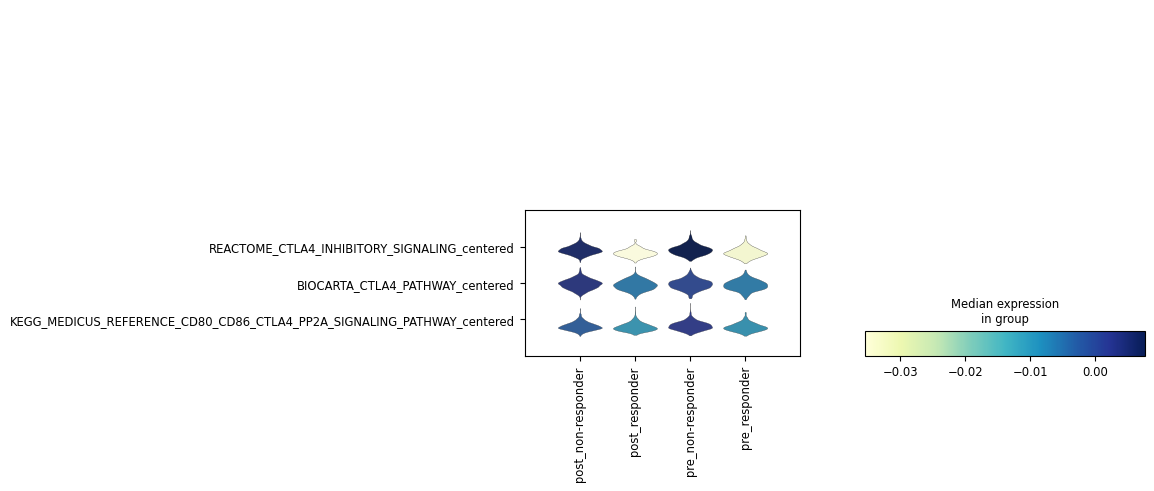

In [12]:
# Subset cells for a specific cell type
adata_Tex=adata[adata.obs['annotation_minor']=='T CD8 ex']

sc.tl.score_genes(adata_Tex
                     ,gene_list=GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_UP
                     ,score_name='BIOCARTA_CTLA4_PATHWAY')
sc.tl.score_genes(adata_Tex
                     ,gene_list=GSE26495_PD1HIGH_VS_PD1LOW_CD8_TCELL_DN
                     ,score_name='KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SIGNALING_PATHWAY')
sc.tl.score_genes(adata_Tex
                     ,gene_list=GSE41867_DAY15_EFFECTOR_VS_DAY30_EXHAUSTED_CD8_TCELL_LCMV_CLONE13_UP
                     ,score_name='REACTOME_CTLA4_INHIBITORY_SIGNALING')

adata_Tex

GSE_sig_list=['REACTOME_CTLA4_INHIBITORY_SIGNALING'
              ,'BIOCARTA_CTLA4_PATHWAY'
              ,'KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SIGNALING_PATHWAY'
             ]
# visualize
## center values
for score in GSE_sig_list:
    adata_Tex.obs[score + '_centered']=adata_Tex.obs[score]-np.mean(adata_Tex.obs[score])


_, ax = plt.subplots(figsize=(8, 4.5))
sc.pl.stacked_violin(adata_Tex
                       ,groupby='timepoint_response'
                        ,var_names=[score + '_centered' for score in GSE_sig_list],
                        swap_axes=True,
                        cmap="YlGnBu"
                        ,stripplot=False#True
                        ,jitter=True
                        ,return_fig=True
                         ,ax=ax
                        ).show()
